# Metody Obliczeniowe w Nauce i Technice Laboratorium 2
## Rozwiazywanie układów równan liniowych
### Paweł Gorgolewski

## 1. Metoda Gaussa-Jordana

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

In [2]:
def full_pivoting(A: np.array, B: np.array, min_id: int, curr_col_order: list):
    n = A.shape[0]
    max_row_id, max_col_id = np.unravel_index(np.abs(A[min_id:, min_id:]).argmax(), [n-min_id, n-min_id])
    max_row_id += min_id
    max_col_id += min_id

    if max_row_id != min_id:
        #lets, change rows
        A[[min_id, max_row_id]], B[[min_id, max_row_id]] = A[[max_row_id, min_id]], B[[max_row_id, min_id]]

    if max_col_id != min_id:
        #lets change cols
        A[:, [min_id, max_col_id]] = A[:, [max_col_id, min_id]]

    #scaling
    scaling_val = A[min_id, min_id]
    A[min_id] /= scaling_val
    B[min_id] /= scaling_val

    curr_col_order.append((min_id, max_col_id))

def gauss_jordan_full_pivoting(A: np.array, B: np.array):
    n = A.shape[0]
    if n < A.shape[1]:
        print("Too many unknows")
        return None

    A_copy, B_copy = np.copy(A), np.copy(B)
    permutations = list()
    for i in range(n):
        full_pivoting(A_copy, B_copy, i, permutations) #Reshape A i B to get the piwot at the top
        pivot = A_copy[i,i]
        for j in range(n):
            if j==i: 
                continue
            
            m = A_copy[j,i]/pivot
            A_copy[j] = np.subtract(A_copy[j], A_copy[i]*m)
            B_copy[j] = np.subtract(B_copy[j], B_copy[i]*m)

    for i in range(n):
        B_copy[i] /= A_copy[i,i]

    #Now we have results in B but without a proper order
    while permutations:
        i, j = permutations.pop()
        B_copy[[j, i]] = B_copy[[i, j]]

    return B_copy

In [3]:
def partial_piwoting(A: np.array, B: np.array, row_id: int):
    n = A.shape[0]
    max_row_id, max_col_id = np.unravel_index(np.abs(A[row_id:, row_id]).argmax(), [n-row_id, 1])
    max_row_id += row_id

    if max_row_id != row_id:
        #lets, change rows
        A[[row_id, max_row_id]], B[[row_id, max_row_id]] = A[[max_row_id, row_id]], B[[max_row_id, row_id]]

    #scaling
    scaling_val = A[row_id, row_id]
    A[row_id] /= scaling_val
    B[row_id] /= scaling_val

    return A,B

def gauss_jordan(A: np.array, B: np.array):
    n = A.shape[0]
    A_copy, B_copy = np.copy(A), np.copy(B)

    if n < A_copy.shape[1]:
        print("Too many unknows")
        return None

    for i in range(A.shape[1]):
        partial_piwoting(A_copy, B_copy, i) #Reshape A i B to get the piwot at the top
        pivot = A_copy[i,i]

        for j in range(i+1, n):
            #lets go w dół
            m = A_copy[j,i]/pivot
            A_copy[j] = np.subtract(A_copy[j], A_copy[i]*m)
            B_copy[j] = B_copy[j] - B_copy[i] * m

        for z in range(0, i):
            #lets go w górę
            m = A_copy[z,i]/pivot
            A_copy[z] = np.subtract(A_copy[z], A_copy[i]*m)
            B_copy[z] = B_copy[z] - B_copy[i] * m

    for i in range(n):
        B_copy[i] = B_copy[i]/A_copy[i,i]

    return B_copy

In [4]:
def test_gauss_jordan(size: int):
    random.seed(10)
    matrix = np.random.random((size, size))
    results = np.random.random((size, 1))
    time_res = dict()

    start = time.time()
    part = gauss_jordan(matrix, results)
    time_res["part"] = time.time() - start

    start = time.time()
    full = gauss_jordan_full_pivoting(matrix, results)
    time_res["full"] = time.time() - start

    start = time.time()
    res = np.linalg.solve(matrix, results)
    time_res["numpy"] = time.time() - start

    print(f"MATRIX SIZE: {size}")

    print(f"TIMES: partial_pivot: {time_res['part']}, full_pivot: {time_res['full']}, numpy_linalg_solve: {time_res['numpy']}")
    np.testing.assert_allclose(res, full)
    print(f"Full pivoting works fine with size")

    np.testing.assert_allclose(part, res)
    print(f"Partial pivoting works fine with size\n")

    return time_res

Sprawdzenie poprawności zarówno dla `partial_pivoting` jak i `full_pivoting` wraz z wykresem zależności czasu od wielkości macierzy:

In [5]:
result = dict()

for i in range(20):
    tested_size = 50 + 50*i
    result[tested_size] = test_gauss_jordan(tested_size)

MATRIX SIZE: 50
TIMES: partial_pivot: 0.0249330997467041, full_pivot: 0.021940946578979492, numpy_linalg_solve: 0.026930809020996094
Full pivoting works fine with size
Partial pivoting works fine with size

MATRIX SIZE: 100
TIMES: partial_pivot: 0.08228397369384766, full_pivot: 0.08498954772949219, numpy_linalg_solve: 0.0
Full pivoting works fine with size
Partial pivoting works fine with size

MATRIX SIZE: 150
TIMES: partial_pivot: 0.18751740455627441, full_pivot: 0.20182061195373535, numpy_linalg_solve: 0.0029926300048828125
Full pivoting works fine with size
Partial pivoting works fine with size

MATRIX SIZE: 200
TIMES: partial_pivot: 0.3390936851501465, full_pivot: 0.3590397834777832, numpy_linalg_solve: 0.0009982585906982422
Full pivoting works fine with size
Partial pivoting works fine with size

MATRIX SIZE: 250
TIMES: partial_pivot: 0.5193650722503662, full_pivot: 0.5581352710723877, numpy_linalg_solve: 0.000997304916381836
Full pivoting works fine with size
Partial pivoting wo

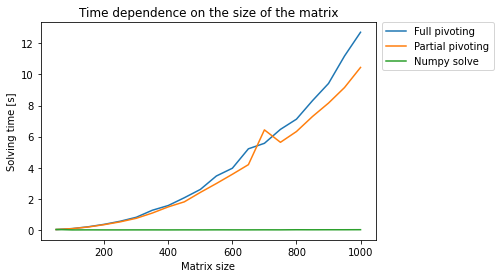

In [6]:
def create_time_plot(times):
    N = list(times.keys())

    full_piv = [times[n]['full'] for n in N]
    part_piv = [times[n]['part'] for n in N]
    numpy = [times[n]['numpy'] for n in N]

    plt.plot(N, full_piv)
    plt.plot(N, part_piv)
    plt.plot(N, numpy)
    plt.legend(['Full pivoting', 'Partial pivoting', 'Numpy solve'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xlabel('Matrix size')
    plt.ylabel('Solving time [s]')
    plt.title(f"Time dependence on the size of the matrix")
    plt.show()

create_time_plot(result)

Wnioski:
1. Algorytm jest poprawny -> nie pojawił się żaden *AssertioError* podczas testowania
2. Poprzez zastosowanie operacji z biblioteki numpy, `full pivoting` jest tylko nieznacznie wolniejszy od `partial pivotingu`

## 2. Faktoryzacja LU